Remuestreo Bootstrap

Diseñe, implemente y verifique una función, que estime la varianza de una V.A. a partir de una muestra de
datos. A continuación, implemente una función que utilize boostrap resampling para calcular los intervalos
de confidencia del estimador de la varianza con un nivel de significancia dado $\alpha$.

In [20]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from scipy import stats

Varianza muestral: 2.225189740761169


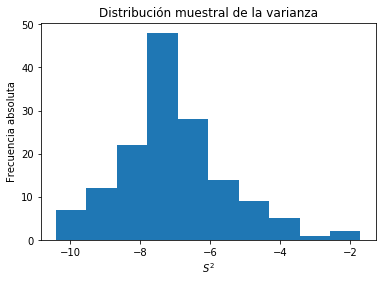

In [21]:
#Cargamos el archivo. 
data = np.genfromtxt('cumulos_globulares.dat', usecols=6) #Son magnitudes de estrellas en un cúmulo

# data tiene NaNs, así que usamos solo los numéricos.
data = data[~np.isnan(data)]

n=len(data)  #defino n como el tamaño de la muestra

xm= sum(data)/n               #Calculo la media muestral
s2= sum((data-xm)**2)/(n-1)   #Calculo varianza muestral
print('Varianza muestral:', s2)
plt.hist(data)
plt.title('Distribución muestral de la varianza')
plt.xlabel('$S^2$')
plt.ylabel('Frecuencia absoluta')
plt.show()

A continuación, se realizan remuestreos para aplicar el método de bootstrap y calcular el intervalo de confianza.

Se pide al usuario que ingrese el numero de muestras nuevas aleatorias. Estas seran del mismo tamaño que la original. Para cada muestra se calcula la varianza muestral y se guardan en una lista.

Abajo se grafica la distribución obtenida para la varianza para verla visualmente.

Ingrese el numero de veces que desea realizar el remuestreo: 5000


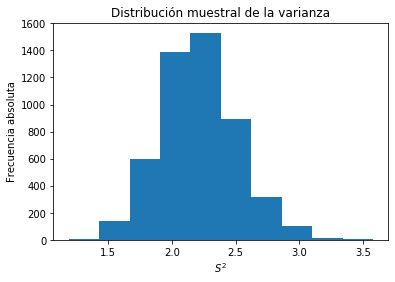

In [23]:
m=int(input("Ingrese el numero de veces que desea realizar el remuestreo: "))
var_mues=[]
for i in range(m):
    muestra_nueva=np.random.choice(data, size=n) #genera una muestra aleatoria a partir de un array de tamaño n
    xm= sum(muestra_nueva)/n               #calculo media muestral
    s2= sum((muestra_nueva-xm)**2)/(n-1)   #calculo varianza muestral
    var_mues.append(s2)        


#Grafico el histograma de las varianzas calculadas
plt.hist(var_mues)
plt.title('Distribución muestral de la varianza')
plt.xlabel('$S^2$')
plt.ylabel('Frecuencia absoluta')
plt.show()

A continuación, se quiere calcular los intervalos de confidencia del estimador de la varianza con un nivel de significancia $\alpha$ dado. El intervalo de confianza va a estar definido entre los valores $(q_1, q_2)$, tal que el área bajo la curva de la distribución encerrada entre ellos es igual a $\alpha$.

Como en el histograma formado para la varianza se ve que la distribución que se forma es simétrica, se pide que el intervalo de confianza sea simétrico. Por lo tanto, las colas de la distribución (es decir $S^2<q_1$ y $S^2>q_2$), van a tener un área bajo la curva de valor $\frac{1-\alpha}{2}$ cada una. Luego, se buscan los valores de $q_1$ y $q_2$ que cumplan con lo siguiente:
$$\frac{N(S^2<q_1)}{B}=\frac{1-\alpha}{2}$$$$\frac{N(S^2>q_2)}{B}=\frac{1-\alpha}{2}$$

donde N() indica el número de valores de $S^2$ que cumplen esa codición.

Programa para calcular q1:

In [24]:
def IC_q1(var, a):   #a es alpha 
    var.sort()       #ordeno los valores de menor a mayor
    suma=0
    y=(1-a)/2        #condición que quiero que se cumpla
    for i in range(len(var)):
        x=var[i]     #defino como x el elemento i de la varianza
        suma=suma+x  #los sumo
        t=suma/(len(var))  #divido por la cantidad de muestras
        if t<= y:
            None
        else:
            q1=x
            break
    return q1


def IC_q2(var, a): 
    var.sort(reverse=True) #ordeno los valores de mayor a menor
    suma=0
    y=(1-a)/2    
    for i in range(len(var)):
        x=var[i]     
        suma=suma+x  
        t=suma/(len(var))  
        if t<= y:
            None
        else:
            q2=x
            break
    return q2

Como ejemplo, se toma el valor de $\alpha$=0.95 y 0.9 para computar el valor final obtenido para la varianza con su intervalo de confianza.

In [25]:
alfa=float(input("Ingrese el valor de significancia para el intervalo de confianza: "))

q1=IC_q1(var, a=alfa)
print('Valor de q1=', q1)

q2=IC_q2(var, a=alfa)
print('Valor de q2=', q2)

print('El valor que se obtiene para la varianza es ', s2, 'con un intervalo de confianza de (', q1, ',', q2,').')


Ingrese el valor de significancia para el intervalo de confianza: 0.97
Valor de q1= 1.5692221548078689
Valor de q2= 2.989838021695166
El valor que se obtiene para la varianza es  1.893542687074829 con un intervalo de confianza de ( 1.5692221548078689 , 2.989838021695166 ).



Conclusiones

Por medio del método de remuestreo bootstrap se puede conocer la varianza de una variable aleatoria y una estimación de su incerteza de la cual no se tiene conocimiento sobre su distribución. Además se puede calcular un intervalo de confianza para un determinado valor de $\alpha$ mediante el calculo de los límites inferiores y superiores del intervalo.

Se puede ver que la distribución de la varianza tiene forma de campana centrada en el valor estimado de la varianza muestral, por lo que el intervalo de confianza es simétrico.
